# Import

In [2]:
import os
import sys

import pickle
import math
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import copy
import random
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

import datetime
import time
from IPython.display import clear_output

from grace.utils import *

# Initialization

In [3]:
calib_params = load_json('config/calib/calib_params.json')

# Loading of Data

In [4]:
filename = "acc_baseline_20240111_031158_573004.csv"

In [5]:
fn_path = os.path.join(os.getcwd(), 'results', filename)
df = pd.read_csv(fn_path)
df

,theta_left_pan,theta_right_pan,theta_tilt,chest_cam_px_dx,chest_cam_px_dy,left_eye_px_dx,left_eye_px_dy,right_eye_px_dx,right_eye_px_dy,plan_phi_left_pan,plan_phi_right_pan,plan_phi_tilt,chest_img_stamp,left_eye_img_stamp,right_eye_img_stamp
0,-9.316406,-10.810547,-3.251953,363.996307,126.223480,425.821899,251.392517,304.025482,261.032654,-0.105407,-0.157763,-0.068629,1.704912e+09,1.704912e+09,1.704912e+09
1,-4.130859,-5.800781,-9.843750,389.709625,151.581543,395.841614,248.498642,247.539810,257.816406,-0.053371,-0.110024,-0.113811,1.704912e+09,1.704912e+09,1.704912e+09
2,-2.373047,-4.218750,-16.259766,313.499756,153.342941,297.110016,217.943069,146.249298,225.473969,-0.186992,-0.240373,-0.110967,1.704912e+09,1.704912e+09,1.704912e+09
3,-6.064453,-7.998047,-15.996094,239.463226,154.753891,261.107880,216.612854,139.020050,223.495834,-0.315209,-0.360698,-0.113051,1.704912e+09,1.704912e+09,1.704912e+09
4,-10.634766,-12.128906,-16.259766,389.708954,151.578339,474.959473,220.266266,352.739655,231.352600,-0.060612,-0.113462,-0.115098,1.704912e+09,1.704912e+09,1.704912e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,-9.667969,-11.250000,-3.164062,364.622833,203.936661,447.208160,327.984924,314.347778,335.108276,-0.103734,-0.156121,-0.204914,1.704914e+09,1.704914e+09,1.704914e+09
5396,-4.042969,-5.800781,-28.916016,389.678894,151.582184,403.417480,165.913177,258.141022,178.400467,-0.053034,-0.110413,-0.116618,1.704914e+09,1.704914e+09,1.704914e+09
5397,-2.285156,-4.218750,-17.050781,389.391510,125.504951,367.550842,189.830231,223.611053,198.975082,-0.053476,-0.110804,-0.067986,1.704914e+09,1.704914e+09,1.704914e+09
5398,-2.285156,-4.218750,-9.931641,364.158020,152.223740,342.432922,245.529266,196.452271,255.151001,-0.097719,-0.154310,-0.113811,1.704914e+09,1.704914e+09,1.704914e+09


In [6]:
dx_l = df['left_eye_px_dx'] - calib_params['left_eye']['x_center']
dx_r = df['right_eye_px_dx'] - calib_params['right_eye']['x_center']

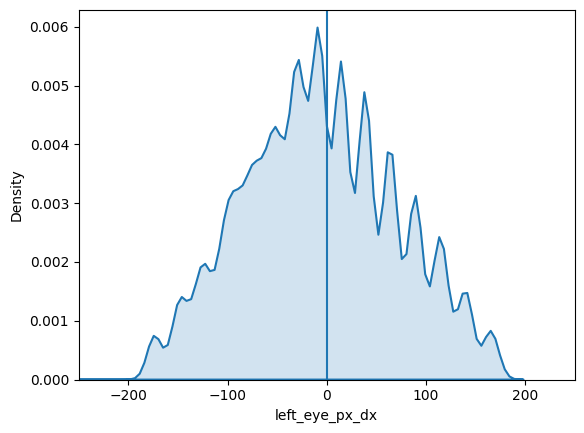

In [7]:
sns.kdeplot(dx_l, fill=True,alpha=.2, linewidth=1.5, bw_adjust=0.4)
plt.xlim([-250, 250])
plt.axvline(0)

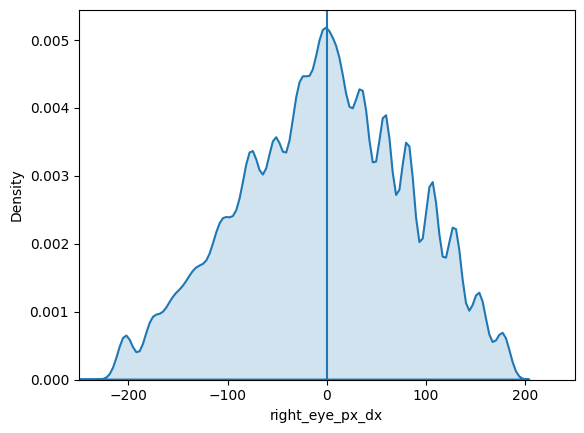

In [8]:
sns.kdeplot(dx_r, fill=True,alpha=.2, linewidth=1.5, bw_adjust=0.4)
plt.xlim([-250, 250])
plt.axvline(0)

In [9]:
dy_l = df['left_eye_px_dy'] - calib_params['left_eye']['y_center']
dy_r = df['right_eye_px_dy'] - calib_params['right_eye']['y_center']

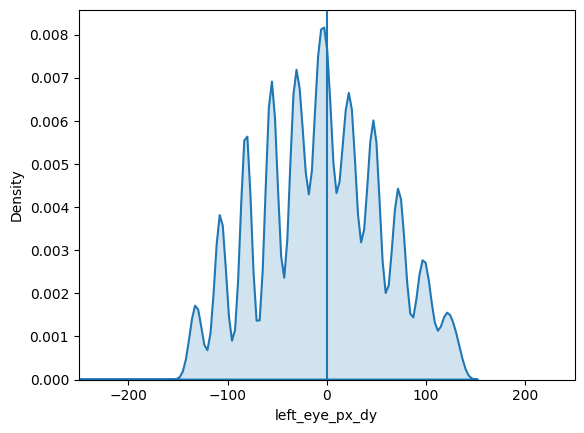

In [10]:
sns.kdeplot(dy_l, fill=True,alpha=.2, linewidth=1.5, bw_adjust=0.4)
plt.xlim([-250, 250])
plt.axvline(0)

In [ ]:
%matplotlib tk
sns.kdeplot(dy_l, fill=True,alpha=.2, linewidth=1.5, bw_adjust=0.4)
plt.xlim([-250, 250])
plt.axvline(0)

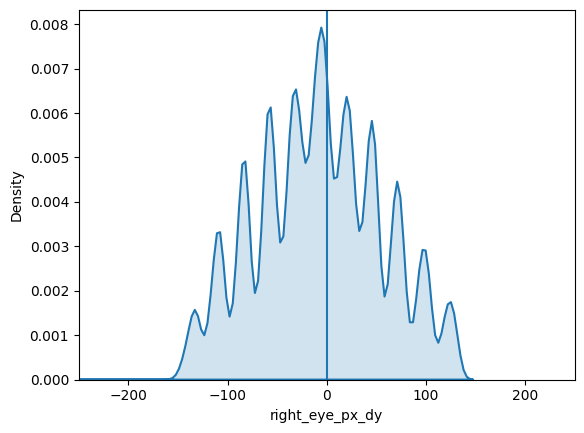

In [11]:
sns.kdeplot(dy_r, fill=True,alpha=.2, linewidth=1.5, bw_adjust=0.4)
plt.xlim([-250, 250])
plt.axvline(0)

## Scatter Plot

(250.0, 50.0)

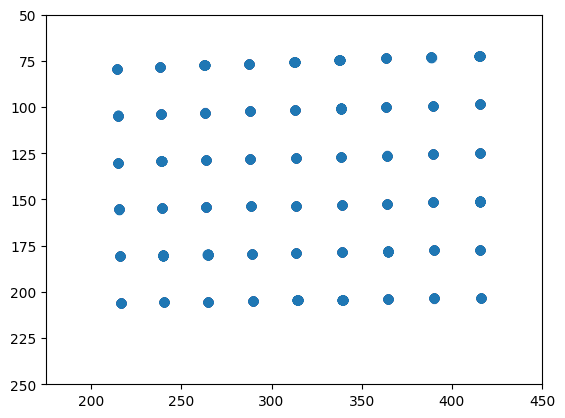

In [12]:
plt.scatter(df['chest_cam_px_dx'], df['chest_cam_px_dy'], alpha=0.3)
plt.xlim([175, 450])
plt.ylim([250, 50])

(400.0, 50.0)

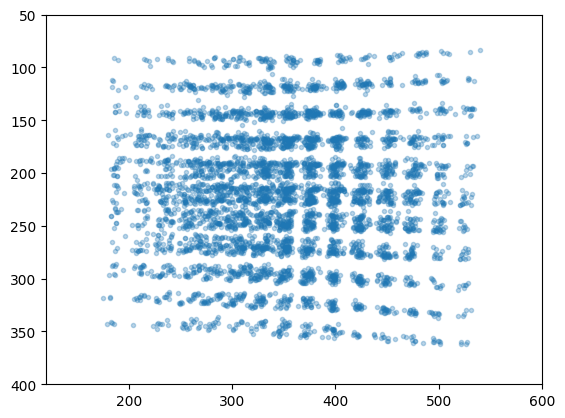

In [13]:
plt.scatter(df['left_eye_px_dx'], df['left_eye_px_dy'], marker='.', alpha=0.3)
plt.xlim([120, 600])
plt.ylim([400, 50])

(260.0, 185.0)

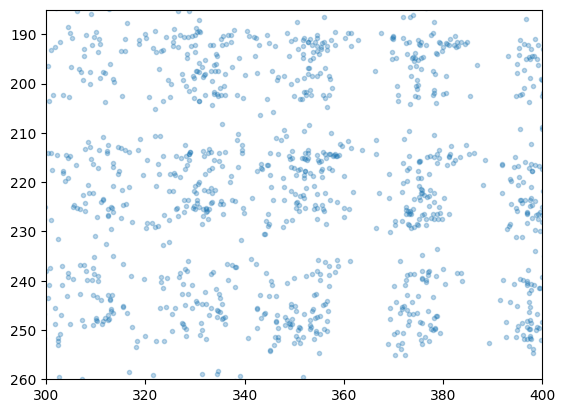

In [14]:
plt.scatter(df['left_eye_px_dx'], df['left_eye_px_dy'], marker='.', alpha=0.3)
plt.xlim([300, 400])
plt.ylim([260, 185])

(400.0, 50.0)

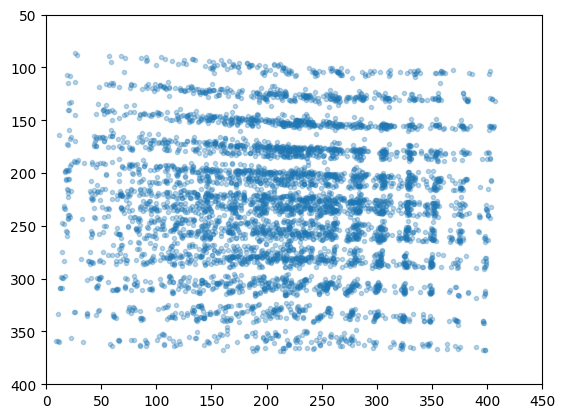

In [15]:
plt.scatter(df['right_eye_px_dx'], df['right_eye_px_dy'], marker='.', alpha=0.3)
plt.xlim([0, 450])
plt.ylim([400, 50])

In [ ]:
left_left_p = [i for i in range(1,len(data["prev_theta_p"])) if data["new_theta_p"][i-1]<data["prev_theta_p"][i-1]
                and data["new_theta_p"][i]<data["prev_theta_p"][i]]
left_right_p = [i for i in range(1,len(data["prev_theta_p"])) if data["new_theta_p"][i-1]<data["prev_theta_p"][i-1] 
               and data["new_theta_p"][i]>=data["prev_theta_p"][i]]
right_left_p = [i for i in range(1,len(data["prev_theta_p"])) if data["new_theta_p"][i-1]>=data["prev_theta_p"][i-1] 
               and data["new_theta_p"][i]<data["prev_theta_p"][i]]
right_right_p = [i for i in range(1,len(data["prev_theta_p"])) if data["new_theta_p"][i-1]>=data["prev_theta_p"][i-1] 
               and data["new_theta_p"][i]>=data["prev_theta_p"][i]]